In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

In [7]:
# data_dir = 
# data_fname = ''
# data_fpath = os.path.join(data_dir,data_fname)
df = pd.read_excel('../data/atoabsgovhack2017.xlsx',sheetname='Data')
df.drop('id',axis=1,inplace=True)
df.head()

,Income year,Postcode,Individuals1,Taxable income or loss1,Net tax,Gross interest,Net rent,Net capital gain,Total income or loss,Total deductions,...,Sub-Saharan African,Male,Female,under or 0,$1 to 1000,1000-1999,2000+,Married in a registered marriage,Married in a de facto marriage,Not married
0,2006,800,1660,80189786,19291288,982029,-948556,2189379,84768019,4545219,...,3,1482,999,85,1114,476,111,333,269,742
1,2006,810,13355,625078283,140888692,5565972,-6677386,10236677,652244699,27017769,...,237,13600,13180,1248,12535,4605,635,7255,2543,8488
2,2006,812,9310,430513198,95521802,2948602,-5188619,5747701,447131373,16575272,...,86,9461,9514,948,8521,3126,334,5766,1806,5314
3,2006,820,9115,501290855,128219514,5263994,-5609933,14737411,527167085,25752080,...,56,9419,8172,787,7311,3668,870,4498,2012,5212
4,2006,828,440,23944386,6292688,260607,-62955,2316623,24894721,943140,...,0,476,433,60,350,141,26,249,48,203


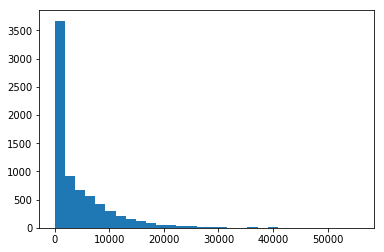

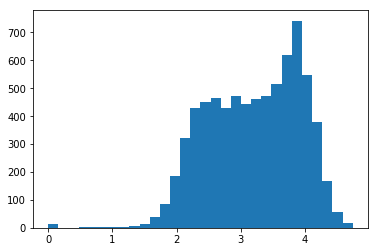

In [52]:
plt.hist(df['Female'],30)
plt.show()
plt.hist(np.log10(1+df['Female']),30)
plt.show()

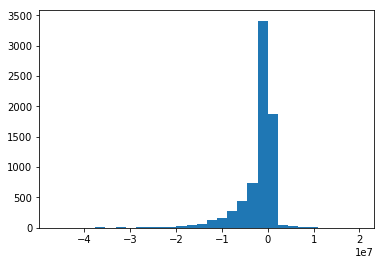

In [48]:
plt.hist((1+ df['Net rent']),30)
plt.show()

In [63]:
# Preprocess the data 
# take log on everything except x values and Net rent
dropped_cols = ['Income year','Postcode','Net rent']
logged_data = np.log10(1+df.drop(dropped_cols,axis=1))
logged_df = pd.concat([df[dropped_cols],logged_data], axis=1)
logged_df.head()

,Income year,Postcode,Net rent,Individuals1,Taxable income or loss1,Net tax,Gross interest,Net capital gain,Total income or loss,Total deductions,...,Sub-Saharan African,Male,Female,under or 0,$1 to 1000,1000-1999,2000+,Married in a registered marriage,Married in a de facto marriage,Not married
0,2006,800,-948556,3.220370,7.904119,7.285361,5.992125,6.340321,7.928232,6.657555,...,0.602060,3.171141,3.000000,1.934498,3.047275,2.678518,2.049218,2.523746,2.431364,2.870989
1,2006,810,-6677386,4.125676,8.795934,8.148876,6.745541,7.010159,8.814411,7.431650,...,2.376577,4.133571,4.119948,3.096562,4.098159,3.663324,2.803457,3.860697,3.405517,3.928857
2,2006,812,-5188619,3.968996,8.633986,7.980103,6.469616,6.759494,8.650435,7.219461,...,1.939519,3.975983,3.978409,2.977266,3.930542,3.495128,2.525045,3.760950,3.256958,3.725503
3,2006,820,-5609933,3.959804,8.700090,8.107954,6.721315,7.168421,8.721948,7.410812,...,1.755875,3.974051,3.912381,2.896526,3.864036,3.564548,2.940018,3.653116,3.303844,3.717088
4,2006,828,-62955,2.644439,7.379204,6.798836,5.415988,6.364856,7.396107,5.974577,...,0.000000,2.678518,2.637490,1.785330,2.545307,2.152288,1.431364,2.397940,1.690196,2.309630


In [78]:
x_scaler = StandardScaler()
standard_data = x_scaler.fit_transform(logged_df)
standard_data[:5]

array([[-1.28, -2.21,  0.26, -0.01,  0.02,  0.11, -0.27,  0.48,  0.02,
         0.07,  0.09, -0.09,  0.48,  0.15,  0.2 ,  0.4 , -0.66, -1.  ,
        -0.77, -0.33,  0.35,  0.45,  0.19,  0.02, -0.19, -0.16, -0.16,
        -0.26, -0.25, -0.49, -0.67, -0.4 , -0.4 , -0.39, -0.51, -0.04,
        -0.52, -0.32, -0.28,  0.03, -0.17,  0.49,  0.49,  0.17, -0.36,
        -0.44, -0.07, -0.29, -0.5 , -0.21,  0.08,  0.09, -0.73,  0.12,
        -0.08],
       [-1.28, -2.2 , -1.02,  1.27,  1.2 ,  1.2 ,  0.76,  1.08,  1.2 ,
         1.12,  1.23,  1.15,  1.29,  1.19,  0.87,  1.06,  1.31,  1.33,
         1.35,  1.35,  1.36,  1.38,  1.39,  1.38,  1.38,  1.39,  1.38,
         1.43,  1.2 ,  1.06,  0.89,  0.79,  0.59,  0.39,  0.47,  0.34,
        -0.52,  1.44,  1.23,  1.29,  1.07,  1.72,  1.4 ,  1.26,  1.16,
         1.56,  1.34,  1.28,  1.11,  1.32,  1.34,  0.95,  1.13,  1.5 ,
         1.32],
       [-1.28, -2.2 , -0.68,  1.05,  0.98,  0.99,  0.38,  0.85,  0.98,
         0.83,  1.05,  0.94,  1.08,  0.95,  0

In [80]:
standard_data.shape

(7350, 55)

In [81]:
#split data into training and testing
train_data, test_data = train_test_split(standard_data, test_size = 0.2, random_state = 1)

In [85]:
logged_df.head()

,Income year,Postcode,Net rent,Individuals1,Taxable income or loss1,Net tax,Gross interest,Net capital gain,Total income or loss,Total deductions,...,Sub-Saharan African,Male,Female,under or 0,$1 to 1000,1000-1999,2000+,Married in a registered marriage,Married in a de facto marriage,Not married
0,2006,800,-948556,3.220370,7.904119,7.285361,5.992125,6.340321,7.928232,6.657555,...,0.602060,3.171141,3.000000,1.934498,3.047275,2.678518,2.049218,2.523746,2.431364,2.870989
1,2006,810,-6677386,4.125676,8.795934,8.148876,6.745541,7.010159,8.814411,7.431650,...,2.376577,4.133571,4.119948,3.096562,4.098159,3.663324,2.803457,3.860697,3.405517,3.928857
2,2006,812,-5188619,3.968996,8.633986,7.980103,6.469616,6.759494,8.650435,7.219461,...,1.939519,3.975983,3.978409,2.977266,3.930542,3.495128,2.525045,3.760950,3.256958,3.725503
3,2006,820,-5609933,3.959804,8.700090,8.107954,6.721315,7.168421,8.721948,7.410812,...,1.755875,3.974051,3.912381,2.896526,3.864036,3.564548,2.940018,3.653116,3.303844,3.717088
4,2006,828,-62955,2.644439,7.379204,6.798836,5.415988,6.364856,7.396107,5.974577,...,0.000000,2.678518,2.637490,1.785330,2.545307,2.152288,1.431364,2.397940,1.690196,2.309630


In [108]:
model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(53))
model.compile(optimizer='adagrad',loss='mse')

model.fit(train_data[:,:2],train_data[:,2:], epochs=10000, batch_size=64, verbose=0)
model.evaluate(train_data[:,:2], train_data[:,2:], batch_size=64)

  64/5880 [..............................] - ETA: 0s

0.77415665590844185

In [109]:
model.evaluate(test_data[:,:2],test_data[:,2:], batch_size=64)

  64/1470 [>.............................] - ETA: 0s

0.76848264859647164